<a href="https://colab.research.google.com/github/wiv33/A-Learning-python/blob/master/machine-learning/_000_hello_machine/_000_basic/_003_tensorflow_cuk_edu/_001_2/_002_text_scraping_word_cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web Driver install 

In [1]:
!pip install selenium
!apt-get update 
!apt install chromium-chromedriver

from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
driver =webdriver.Chrome('chromedriver',chrome_options=chrome_options)

     |████████████████████████████████| 911kB 2.7MB/s 
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,340 kB]
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:12 htt

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: use options instead of chrome_options
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: use options instead of chrome_options
  # This is added back by InteractiveShellApp.init_path()


In [2]:
from bs4 import BeautifulSoup, builder
import datetime
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as ec
import requests
import pandas as pd

In [3]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.4MB/s 
     |████████████████████████████████| 92kB 8.3MB/s 
     |████████████████████████████████| 3.8MB 39.9MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0


In [4]:
!python --version

Python 3.6.9


## 기사 수집에 필요한 동작과 데이터 csv 파일 전환 객체 생성


In [5]:
class TakeArticle():
    def __init__(self, limit_day: int):
      self.df_docs = pd.DataFrame(columns=['title', 'body'])
      self.current_date = datetime.datetime.now().date()
      self.limit_month = datetime.datetime.today() - datetime.timedelta(days=limit_day)
      self.wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

    def add_more_of_article_list(self):
      """ more 버튼 눌러서 기사 모으기 """
      self.wd.get('https://koreajoongangdaily.joins.com/section/allArticles')

      final_article = datetime.datetime.now().date()
      print("from today to {}".format(self.limit_month.date()))
      # 각 기사의 url을 가져온다.
      cnt = 10
      while self.limit_month.date().__lt__(final_article):
          # print(self.limit_month.date().__lt__(final_article))
          # final_article = datetime.datetime.fromisoformat(wd.find_element_by_css_selector(  # required python version 3.8.6 
          final_article = datetime.datetime.strptime(self.wd.find_element_by_css_selector(
              '#main-second-content > div.article-left > div:nth-child(%d) > a > span.media-date > span' % cnt).text, '%Y-%m-%d').date()
          # print(final_article)
          self.wd.find_element_by_class_name('service-more-btn').click()
          # wd.find_element_by_xpath('//*[@id="article_more"]/button').click()
          time.sleep(1)
          cnt += 10

    def make_docs(self):
      """ 모은 기사 url을 기반으로 DataFrame 내용 채우기 """
      a_list = self.wd.find_elements_by_xpath('//*[@id="main-second-content"]/div[1]/div[*]/a')
      print("a list size is {}".format(len(a_list)))
      for a in a_list:
        # print(a)
        # print('href is {}'.format(a.get_attribute('href')))
        article = requests.get(a.get_attribute('href'))
        soup = BeautifulSoup(article.text, builder.HTML)
        body = soup.select_one('#article_body')
        title = body.select_one(".view-article-title.serif")
        print('title :: {}'.format(title.get_text()))
        body_text = body.get_text()
        # body_text = self.remove_title(body.get_text(), title.get_text())
        self.df_docs = self.df_docs.append({'title': title.get_text(), 'body': body_text}, ignore_index=True)

    def remove_title(self, body, title):
      return body.replace(title, '')

    def make_csv(self):
      """ csv 파일로 변환하기 """
      self.df_docs.to_csv("recent_month_popular_{}.csv".format(self.current_date))


## 기사 생성 필수 데이터 생성 (객체 생성)

In [6]:
article = TakeArticle(30)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: use options instead of chrome_options
  


## selenium을 통해 more 버튼으로 기사 생성

In [7]:
article.add_more_of_article_list()

from today to 2020-09-07


## 기사 url을 가져와 pandas DataFrame 만들기

In [8]:
article.make_docs()

a list size is 730
title :: GS Caltex signs $1.6 million deal with VI Automotive Service
title :: Imported vehicle sales up 15 percent in September
title :: Suspected operator of 'Digital Prison' website pleads guilty, police say
title :: Fitch maintains Korea's AA- credit rating despite Covid-19
title :: Temple trek
title :: Hyundai Motor union surprises with conciliatory stance
title :: March of the mannequins
title :: Hyundai Mobis invests in British tech company
title :: Audit time
title :: Brokerages warned of punishment in Lime scandal
title :: Ban on abortions to be lifted, but only partly
title :: Seoul stocks up for sixth day on hopes of U.S. stimulus package
title :: Culture minister indicates support for offering BTS members alternative military service
title :: New virus infections jump back to triple digits
title :: Ruling party quizzes gov't on debt ceiling plan
title :: Hwang Jae-gyun leads young Wiz squad to the No. 2 spot
title :: Hayeon, sister of Girls’ Generation's 

## 특수문자 제거한 plain body 만들기 위한 copy

In [9]:
df_docs = pd.DataFrame.copy(article.df_docs, deep=True)

In [10]:
df_docs

,title,body
0,GS Caltex signs $1.6 million deal with VI Auto...,\nGS Caltex signs $1.6 million deal with VI Au...
1,Imported vehicle sales up 15 percent in September,\nImported vehicle sales up 15 percent in Sept...
2,Suspected operator of 'Digital Prison' website...,\nSuspected operator of 'Digital Prison' websi...
3,Fitch maintains Korea's AA- credit rating desp...,\nFitch maintains Korea's AA- credit rating de...
4,Temple trek,\nTemple trek\n Abou...
...,...,...
725,[NEWS IN FOCUS] Only question about Big Hit IP...,\n[NEWS IN FOCUS] Only question about Big Hit ...
726,Virus restrictions force people to enjoy great...,\nVirus restrictions force people to enjoy gre...
727,Defeating virus may be only half the battle,\nDefeating virus may be only half the battle\...
728,Could Seongnam's new striker be the next Hwang...,\nCould Seongnam's new striker be the next Hwa...


## csv 파일 생성하기 (현재 디렉터리에 날짜 형식으로 파일 생성)

In [11]:
# article.make_csv()

## 특수문자 제거를 위한 정규표현 모듈 선언

In [12]:
import re

## 총 word count 생성

In [13]:
df_docs['wordCount'] = df_docs['body'].apply(lambda x: len(x.split()))

In [14]:
df_docs

,title,body,wordCount
0,GS Caltex signs $1.6 million deal with VI Auto...,\nGS Caltex signs $1.6 million deal with VI Au...,125
1,Imported vehicle sales up 15 percent in September,\nImported vehicle sales up 15 percent in Sept...,342
2,Suspected operator of 'Digital Prison' website...,\nSuspected operator of 'Digital Prison' websi...,371
3,Fitch maintains Korea's AA- credit rating desp...,\nFitch maintains Korea's AA- credit rating de...,544
4,Temple trek,\nTemple trek\n Abou...,58
...,...,...,...
725,[NEWS IN FOCUS] Only question about Big Hit IP...,\n[NEWS IN FOCUS] Only question about Big Hit ...,722
726,Virus restrictions force people to enjoy great...,\nVirus restrictions force people to enjoy gre...,673
727,Defeating virus may be only half the battle,\nDefeating virus may be only half the battle\...,757
728,Could Seongnam's new striker be the next Hwang...,\nCould Seongnam's new striker be the next Hwa...,873


## 특수문자 제거

In [15]:
def clean_text(txt: str) -> str:
  return re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》\\n\xa0]', ' ', txt)

In [16]:
df_docs['plainBody'] = df_docs['body'].apply(clean_text)

In [17]:
type(df_docs.iloc[:, 3].tolist()), df_docs.iloc[:, 3].tolist()[0]

(list,
 ' GS Caltex signs  1 6 million deal with VI Automotive Service                   GS Caltex  Korea s second largest refiner by sales  said Wednesday that it has signed a deal worth 39 billion Vietnamese dong   1 6 million  with Vietnamese start up VI Automotive Service in its first investment in the emerging country            Under the deal signed in a videoconference Tuesday  GS Caltex is set to acquire a 16 7 percent stake in VI Automotive Service as soon as administrative procedures are wrapped up in Vietnam            VietWash  a subsidiary of VI Automotive Service  operates about 50 car washes in Vietnam            GS Caltex also said it plans to sell lubricant products in the Southeast Asian country            GS Caltex is a 50 50 joint venture between GS Energy and Chevron  the second largest U S  oil producer            Yonhap    ')

## 불용어 제거를 위한 nltk install

In [18]:
!pip install nltk

In [21]:
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Okt
import nltk
from nltk.corpus import stopwords
import collections

nltk.download()


NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

True

## 불용어 제거

In [22]:
words = [y.lower() for x in df_docs.iloc[:, 3].values.flatten() for y in x.split() if len(y) > 1]
stops = set(stopwords.words('english'))
no_stops = [word for word in words if not word in stops]

In [23]:
no_stops[:10]

['gs',
 'caltex',
 'signs',
 'million',
 'deal',
 'vi',
 'automotive',
 'service',
 'gs',
 'caltex']

In [24]:
Counter(no_stops)

Counter({'gs': 19,
         'caltex': 5,
         'signs': 31,
         'million': 480,
         'deal': 152,
         'vi': 9,
         'automotive': 16,
         'service': 267,
         'korea': 1325,
         'second': 329,
         'largest': 105,
         'refiner': 2,
         'sales': 244,
         'said': 2104,
         'wednesday': 281,
         'signed': 72,
         'worth': 106,
         '39': 26,
         'billion': 381,
         'vietnamese': 7,
         'dong': 102,
         'start': 190,
         'first': 858,
         'investment': 139,
         'emerging': 9,
         'country': 200,
         'videoconference': 7,
         'tuesday': 365,
         'set': 209,
         'acquire': 15,
         '16': 80,
         'percent': 1235,
         'stake': 41,
         'soon': 68,
         'administrative': 15,
         'procedures': 19,
         'wrapped': 8,
         'vietnam': 23,
         'vietwash': 1,
         'subsidiary': 27,
         'operates': 13,
         '50': 100,


## skcit-learn tf-idf로 단어 추출하기

In [ ]:
from sklearn.feature_extraction import text

In [ ]:
cv = text.CountVectorizer()
tfidf = text.TfidfVectorizer()

In [ ]:
cv.fit(df_docs.iloc[:, 3])
len(cv.get_feature_names())
cv.vocabulary_
cv.inverse_transform(cv.transform(df_docs.iloc[4:5, 3]).toarray())

In [ ]:
tfidf.fit_transform(df_docs.iloc[:, 3])
tfidf.vocabulary_

In [ ]:
tfidf.inverse_transform(tfidf.transform(df_docs.iloc[3:4, 3]).toarray())

In [ ]:
# okt = Okt()
# okt.nouns(" ".join(words))

## 300개 단어 추출

In [25]:
Counter(no_stops).most_common(300)[:3]

[('said', 2104), ('korea', 1325), ('percent', 1235)]

In [26]:
result = dict(Counter(no_stops).most_common(300))

In [27]:
len(result)

300

In [ ]:
result

## word cloud 생성

In [28]:
wc = WordCloud(
    # font_path="font_path",
    width=800,
    height=800,
    background_color='white'
).generate_from_frequencies(result)

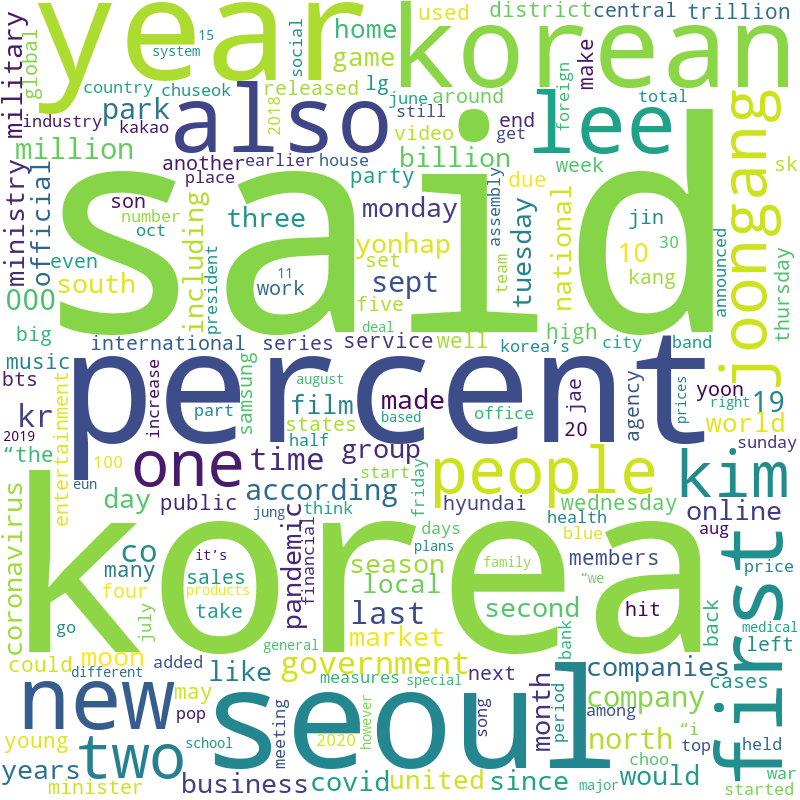

In [29]:
wc.to_image()